In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
house_data = pd.read_csv('archive/kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
house_data.drop(['id','lat','long','zipcode'],inplace=True,axis=1)
house_data.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
6198,20141010T000000,219000.0,2,1.00,1050,9000,1.5,0,0,4,7,1050,0,1984,0,1550,9600
5806,20150430T000000,216500.0,2,1.00,1060,5200,1.0,0,0,3,6,1060,0,1969,0,910,5200
4829,20141030T000000,339950.0,2,1.00,800,3090,1.0,0,0,4,6,800,0,1925,0,1400,3090
18614,20140623T000000,405000.0,3,2.25,1520,1245,3.0,0,0,3,8,1520,0,2004,0,1520,1470
8368,20150105T000000,362500.0,3,1.00,1520,9507,1.0,0,0,3,7,1520,0,1954,0,1360,7219


In [14]:
house_data['date'] = pd.to_datetime(house_data['date'])

house_data['house_age'] =  house_data['date'].dt.year - house_data['yr_built']
house_data.drop(['date','yr_built'],inplace=True,axis=1)

In [15]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x==0 else 1)
house_data = house_data.drop('yr_renovated',axis=1)

In [19]:
house_data.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
728,328000.0,3,1.75,1470,7650,1.0,0,0,3,7,1130,340,1590,7500,31,0
19473,370000.0,3,2.50,1070,1219,2.0,0,0,3,7,720,350,1070,1254,11,0
7746,310000.0,3,1.00,1020,55756,1.0,0,0,3,7,1020,0,1490,12745,54,0
17725,575000.0,2,1.50,1400,5810,2.0,0,0,3,7,1400,0,1470,3920,75,0
11034,998500.0,3,1.75,2140,4800,2.0,0,0,3,8,1690,450,2440,4800,110,0
13312,600000.0,2,2.25,2320,18919,2.0,1,4,4,8,2320,0,1610,18919,39,0
13746,530000.0,4,2.25,1940,8270,2.0,0,0,5,7,1940,0,1800,7743,53,0
5456,785000.0,4,3.00,3370,100681,1.0,0,0,5,8,1920,1450,2440,43705,37,0
580,619000.0,3,2.50,2720,6439,2.0,0,0,3,9,2720,0,3180,7320,9,0
13050,455000.0,4,1.50,1880,11400,1.0,0,0,3,7,1280,600,1880,11400,60,0


In [20]:
house_data.to_csv('archive/house_data_processed.csv',index=False)

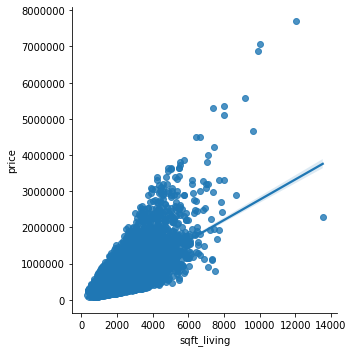

In [22]:
sns.lmplot('sqft_living','price',house_data)

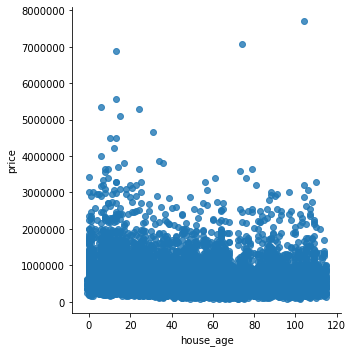

In [23]:
sns.lmplot('house_age','price',house_data)

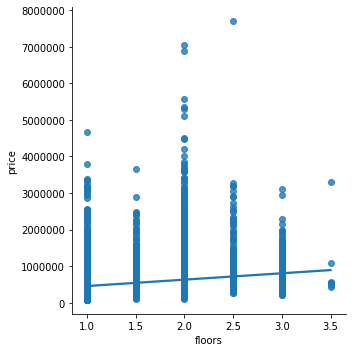

In [25]:
sns.lmplot('floors','price',house_data)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
X = house_data[['sqft_living']]
y = house_data[['price']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [62]:
linear_regression = LinearRegression()

model = linear_regression.fit(X_train,y_train)
y_pred = model.predict(X_test)

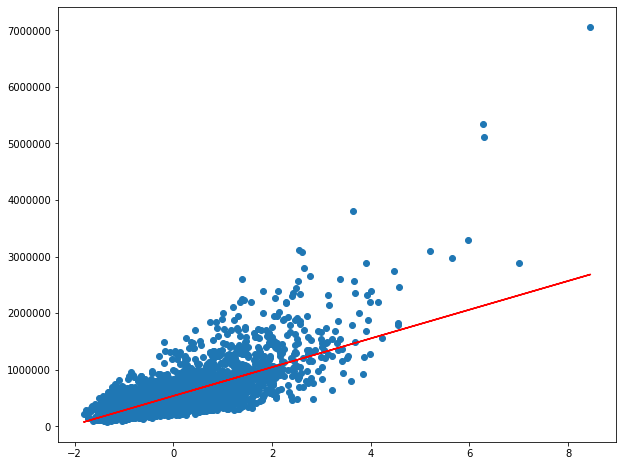

In [66]:
plt.figure(figsize=(10,8))

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,c='r')

In [63]:
print("Training score : ",model.score(X_train,y_train))

Training score :  0.48586050612937925


In [64]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Test score : ", score)

Test score :  0.516768060740875


In [68]:
theta_0 = model.coef_
theta_0

array([[253978.45402792]])

In [70]:
intercept = model.intercept_
intercept

array([538838.54748409])

In [72]:
#how to do linear regression statistically
import statsmodels.api as sm

In [73]:
X_train[:5]

array([[-0.104533  ],
       [ 2.05334429],
       [-0.82747666],
       [ 0.44315159],
       [-0.66317128]])

In [75]:
#adding the intercept 1 as default
X_train = sm.add_constant(X_train)
X_train[:5]

array([[ 1.        , -0.104533  ],
       [ 1.        ,  2.05334429],
       [ 1.        , -0.82747666],
       [ 1.        ,  0.44315159],
       [ 1.        , -0.66317128]])

In [76]:
#notice the R-squared is the same as the machine learning R-squared
#aslo the const and x1 is the same as theta_0 and intercept
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 1.634e+04
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:41:15   Log-Likelihood:            -2.4020e+05
No. Observations:               17290   AIC:                         4.804e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.388e+05   1987.052    271.175      0.0